In [230]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression,LassoCV,RidgeCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder,PowerTransformer,label_binarize,RobustScaler
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV,cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report,silhouette_score,roc_curve,auc, RocCurveDisplay,recall_score,roc_auc_score,davies_bouldin_score,f1_score,precision_recall_curve,ConfusionMatrixDisplay,average_precision_score
from sklearn.datasets import make_classification,make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,IsolationForest,RandomForestRegressor,VotingClassifier
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import euclidean,cityblock,cosine
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris,load_digits
from mlxtend.frequent_patterns import apriori,association_rules
from scipy.stats import mode
from sklearn.neighbors import NearestNeighbors
import streamlit as st
import joblib
import warnings
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
import plotly.express as px
from sklearn.utils import resample
from sklearn.inspection import permutation_importance
import os
from xgboost import XGBClassifier
import time
warnings.filterwarnings('ignore')

In [232]:
df=pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [234]:
df.drop(columns=['Loan_ID'],inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [236]:
df.shape

(381, 12)

In [238]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [240]:
df.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,376,381,373,381,360,381,381
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,291,228,234,278,325,149,271


In [242]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      322
CoapplicantIncome    182
LoanAmount           101
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [246]:
df['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

In [248]:
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [250]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [252]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [254]:
plt.style.use('dark_background')

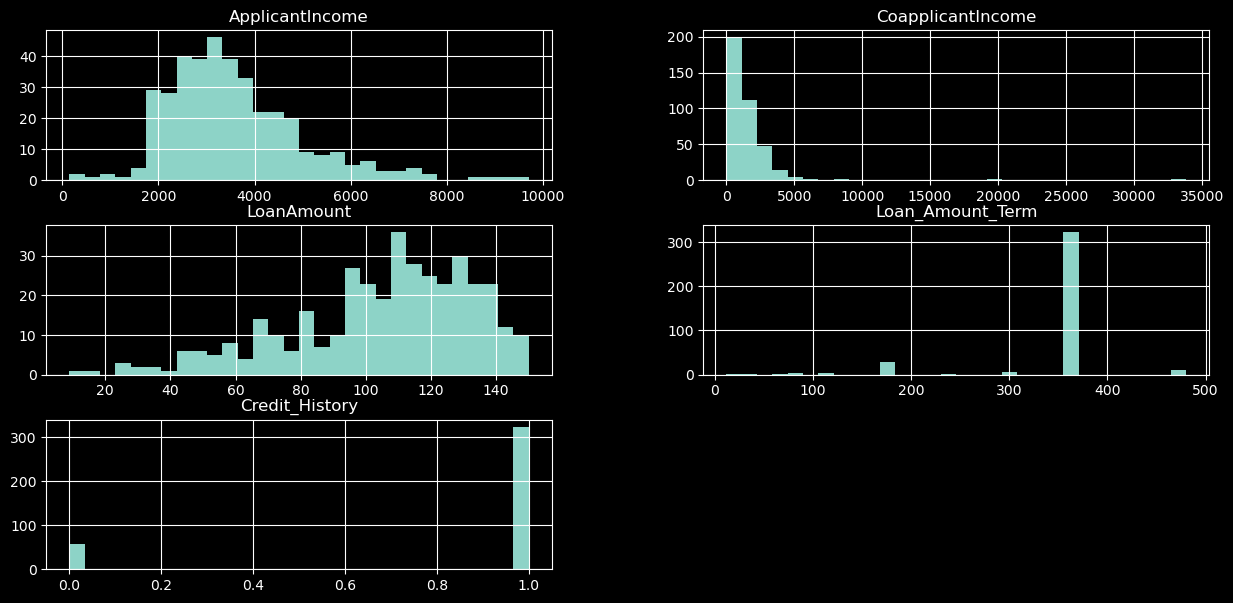

In [256]:
df.hist(bins=30,figsize=(15,7))
plt.show()

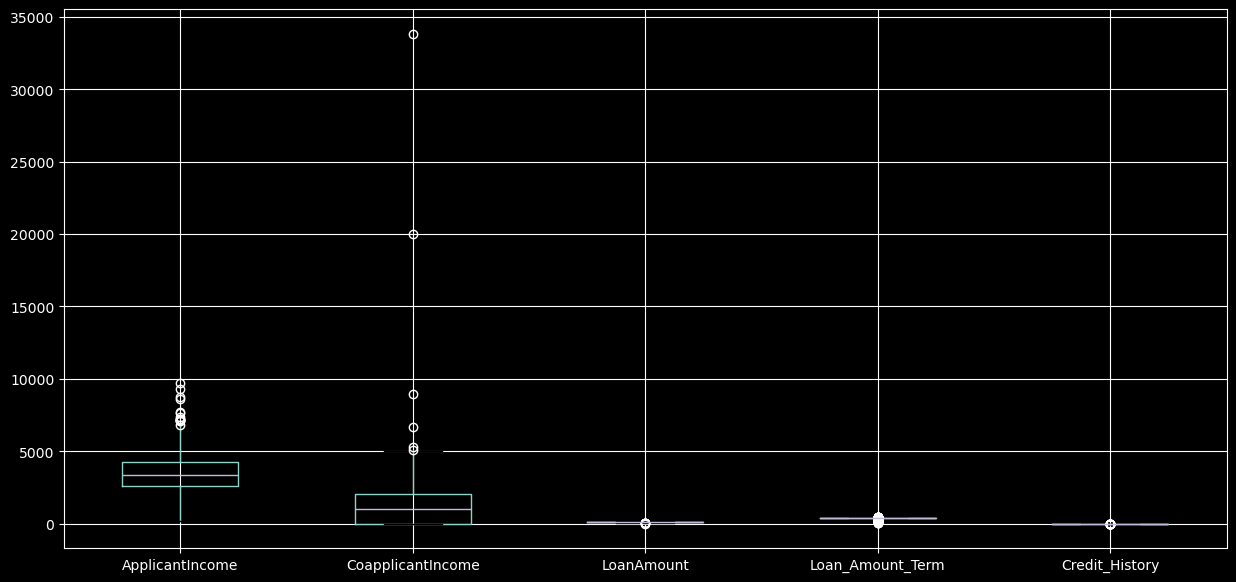

In [257]:
df.boxplot(figsize=(15,7))
plt.show()

In [260]:
df['Credit_History'].value_counts(normalize=True)

Credit_History
1.0    0.850394
0.0    0.149606
Name: proportion, dtype: float64

In [262]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [264]:
categorical_cols = ['Gender', 'Married', 'Dependents', 
                    'Education', 'Self_Employed', 'Property_Area']
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})
encoder=OneHotEncoder(drop='first',sparse_output=False)
encoded=encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate back with numerical columns
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,4583,1508.0,128.0,360.0,1.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3000,0.0,66.0,360.0,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2583,2358.0,120.0,360.0,1.0,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,6000,0.0,141.0,360.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2333,1516.0,95.0,360.0,1.0,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


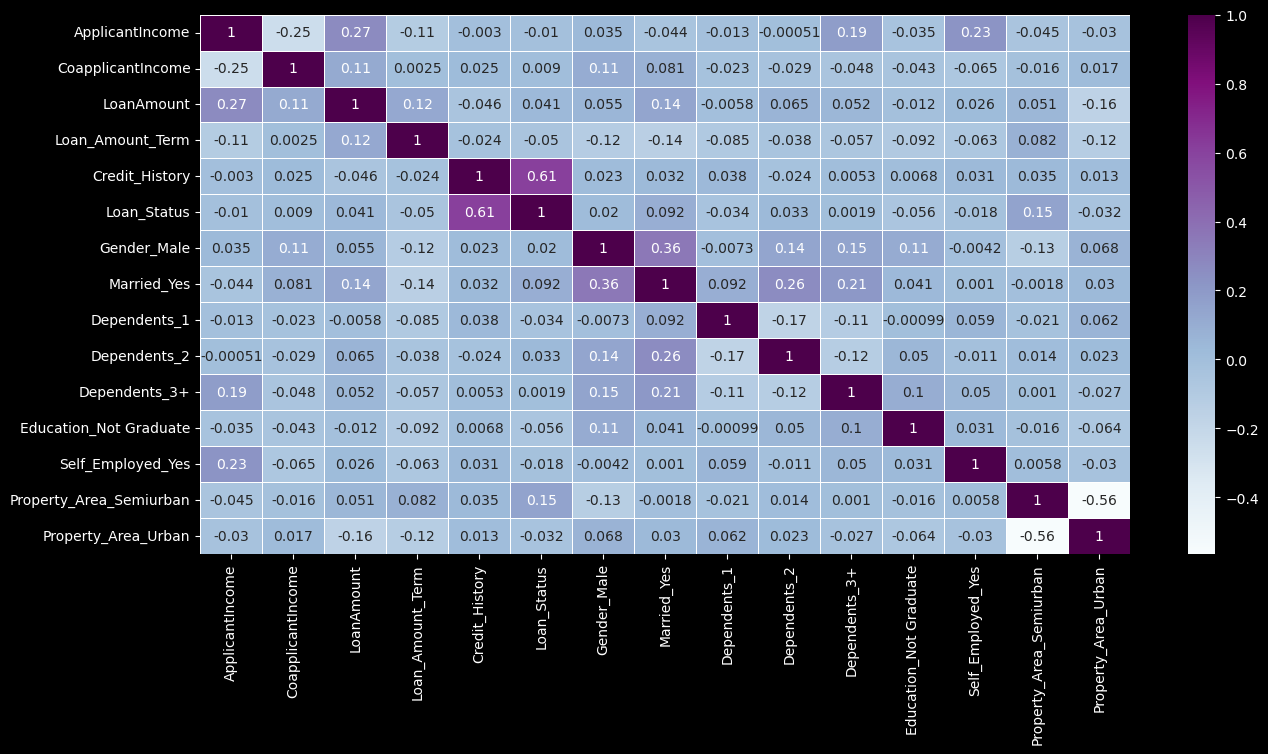

In [266]:
plt.figure(figsize=(15,7))
sns.heatmap(df_encoded.corr(),annot=True,cmap='BuPu',linewidths=0.5)
plt.show()

In [267]:
skewed_cols=['ApplicantIncome','LoanAmount','CoapplicantIncome']
df_encoded[skewed_cols].skew().sort_values(ascending=False)

CoapplicantIncome    8.660692
ApplicantIncome      1.119751
LoanAmount          -0.804282
dtype: float64

In [270]:
def cap_outliers(df,cols):
    df_capped=df_encoded.copy()
    for col in cols:
        Q1=df_encoded[col].quantile(0.25)
        Q3=df_encoded[col].quantile(0.75)
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR
        df_capped[col]=np.clip(df_encoded[col],lower,upper)
    return df_capped
df_capped=cap_outliers(df,skewed_cols)
df_capped

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,4583,1508.0,128.0,360.0,1.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3000,0.0,66.0,360.0,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2583,2358.0,120.0,360.0,1.0,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,6000,0.0,141.0,360.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2333,1516.0,95.0,360.0,1.0,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
377,3232,1950.0,108.0,360.0,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
378,2900,0.0,71.0,360.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
379,4106,0.0,40.0,180.0,1.0,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [272]:
print("Before Yeo-Johnson:")
print(df_capped[skewed_cols].skew())

pt=PowerTransformer(method='yeo-johnson')
df_capped[skewed_cols]=pt.fit_transform(df_capped[skewed_cols])

print("\nAfter Yeo-Johnson:")
print(df_capped[skewed_cols].skew())

Before Yeo-Johnson:
ApplicantIncome      0.666520
LoanAmount          -0.696848
CoapplicantIncome    0.919596
dtype: float64

After Yeo-Johnson:
ApplicantIncome      0.084019
LoanAmount          -0.203122
CoapplicantIncome   -0.118423
dtype: float64


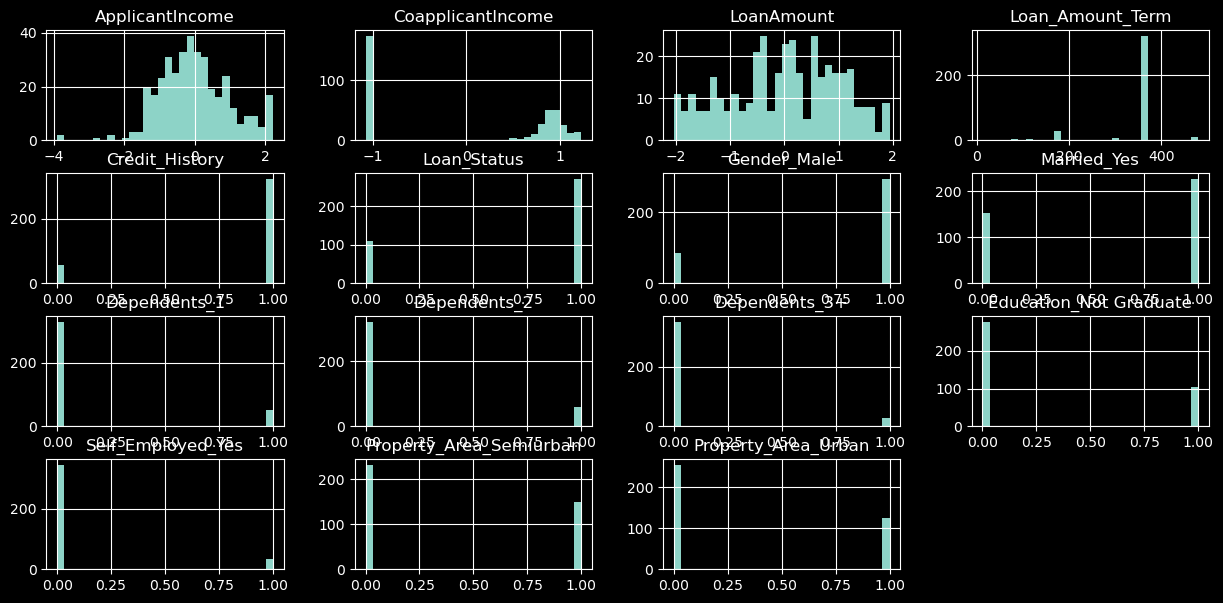

In [274]:
df_capped.hist(bins=30,figsize=(15,7))
plt.show()

In [278]:
scaler=RobustScaler()
df_capped[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=scaler.fit_transform(df_capped[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
df_capped.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.694272,0.065436,0.528214,360.0,1.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.203391,-0.889390,-0.987360,360.0,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.472568,0.135256,0.284701,360.0,1.0,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.387114,-0.889390,0.953528,360.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.643105,0.066253,-0.385612,360.0,1.0,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [330]:
df_majority = df_capped[df_capped.Loan_Status == 1]
df_minority = df_capped[df_capped.Loan_Status == 0]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=len(df_majority), # to match majority class
                                 random_state=42)   # reproducible results

# Combine majority class with upsampled minority class
df_capped = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_capped.Loan_Status.value_counts())


Loan_Status
1    271
0    271
Name: count, dtype: int64


In [332]:
x=df_capped.drop(columns=['Loan_Status'])
y=df_capped['Loan_Status']

In [334]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [336]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred_lr=lr_model.predict(x_test)
print(f'Baseline Logistic Regression Accuracy: {accuracy_score(y_test,y_pred_lr)}')

Baseline Logistic Regression Accuracy: 0.7064220183486238


In [338]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)
print(f"Baseline Random Forest Accuracy: {accuracy_score(y_test,y_pred_rf)}")

Baseline Random Forest Accuracy: 0.9724770642201835


In [340]:
gb_model=GradientBoostingClassifier()
gb_model.fit(x_train,y_train)
y_pred_gb=gb_model.predict(x_test)
print(f"Baseline Gradient Boosting Accuracy: {accuracy_score(y_test,y_pred_gb)}")

Baseline Gradient Boosting Accuracy: 0.9357798165137615


In [342]:
models = {
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", n_estimators=300, random_state=42)
}

results = {}
y_tree_xgb = y_tree - 1
y_train_tree_xgb = y_train_tree - 1
y_test_tree_xgb = y_test_tree - 1
for name, model in models.items():
    start = time.time()
    model.fit(x_train, y_train)  # Use scaled data for LR, original is fine for trees
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    duration = time.time() - start
    report=classification_report(y_test,y_pred)
    
    results[name] = {
        "Accuracy": acc,
        "Time (s)": duration
    }
    
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Training + Prediction time: {duration:.2f} sec")
    print("Classification Report:")
    print(report)


Logistic Regression
Accuracy: 0.7156
Training + Prediction time: 0.06 sec
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.73      0.69        48
           1       0.77      0.70      0.74        61

    accuracy                           0.72       109
   macro avg       0.71      0.72      0.71       109
weighted avg       0.72      0.72      0.72       109


Random Forest
Accuracy: 0.9817
Training + Prediction time: 0.22 sec
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.97      0.98        61

    accuracy                           0.98       109
   macro avg       0.98      0.98      0.98       109
weighted avg       0.98      0.98      0.98       109


XGBoost
Accuracy: 0.9358
Training + Prediction time: 0.10 sec
Classification Report:
              precision    recall  f1-score   support

           0   

In [378]:
models_and_grids = {
    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {'n_estimators': [100, 200],
         'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5],
         'class_weight': [None, 'balanced']}
    ),

    "DecisionTree": (
        DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5],
         'class_weight': [None, 'balanced']}
    ),

    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {'n_estimators': [100, 200],
         'learning_rate': [0.05, 0.1, 0.2],
         'max_depth': [3, 5]}
    ),

    "SVM": (
        SVC(probability=True, random_state=42),
        {'C': [1, 10],
         'kernel': ['linear', 'rbf'],
         'class_weight': [None, 'balanced']}
    ),

    "LogisticRegression": (
        LogisticRegression(max_iter=1000, random_state=42),
        {'C': [0.1, 1, 10],
         'penalty': ['l2'],
         'class_weight': [None, 'balanced']}
    ),

    "KNN": (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}
    )
}

# --------------------------
# 4. Train & evaluate
# --------------------------
results = {}
for name, (model, param_grid) in models_and_grids.items():
    print(f"\n🔍 Training {name}...")
    Xtr, Xte = x_train,x_test
    grid = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid.fit(Xtr, y_train)
    y_pred = grid.best_estimator_.predict(Xte)

    print(f"✅ Best {name}: {grid.best_params_}")
    print(classification_report(y_test, y_pred, digits=3))
    results[name] = (grid.best_params_, classification_report(y_test, y_pred, digits=3, output_dict=True))


🔍 Training RandomForest...
✅ Best RandomForest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0      0.941     1.000     0.970        48
           1      1.000     0.951     0.975        61

    accuracy                          0.972       109
   macro avg      0.971     0.975     0.972       109
weighted avg      0.974     0.972     0.973       109


🔍 Training DecisionTree...
✅ Best DecisionTree: {'class_weight': None, 'max_depth': None, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0      0.842     1.000     0.914        48
           1      1.000     0.852     0.920        61

    accuracy                          0.917       109
   macro avg      0.921     0.926     0.917       109
weighted avg      0.930     0.917     0.918       109


🔍 Training GradientBoosting...
✅ Best GradientBoosting: {'learning_rate': 0.05, 'max_depth

In [380]:
print("Before SMOTE:", y_train.value_counts())

smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Loan_Status
0    223
1    210
Name: count, dtype: int64
After SMOTE: Loan_Status
0    223
1    223
Name: count, dtype: int64


Classification Report (SMOTE + Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        48
           1       0.77      0.72      0.75        61

    accuracy                           0.72       109
   macro avg       0.72      0.73      0.72       109
weighted avg       0.73      0.72      0.73       109

Confusion Matrix:
[[35 13]
 [17 44]]
ROC-AUC: 0.8063524590163935


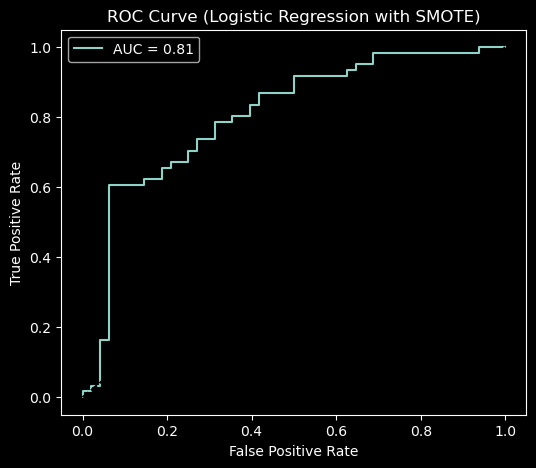

In [382]:
lr_model_smote=LogisticRegression(C=10,penalty='l2',class_weight='balanced',random_state=42)
lr_model_smote.fit(x_train_res,y_train_res)
y_pred_lr=lr_model_smote.predict(x_test)
y_proba_lr=lr_model_smote.predict_proba(x_test)[:,1]
print("Classification Report (SMOTE + Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

# ✅ Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm)

# ✅ ROC-AUC score
roc_auc = roc_auc_score(y_test,y_proba_lr)
print("ROC-AUC:", roc_auc)

# ✅ Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression with SMOTE)")
plt.legend()
plt.show()

                    Feature  Importance
4            Credit_History    4.373575
1         CoapplicantIncome    2.094597
7              Dependents_1    1.134662
12  Property_Area_Semiurban    0.855755
2                LoanAmount    0.662359
0           ApplicantIncome    0.598962
6               Married_Yes    0.474981
5               Gender_Male    0.384231
10   Education_Not Graduate    0.362441
13      Property_Area_Urban    0.335286
11        Self_Employed_Yes    0.237276
8              Dependents_2    0.143528
9             Dependents_3+    0.088852
3          Loan_Amount_Term    0.005571


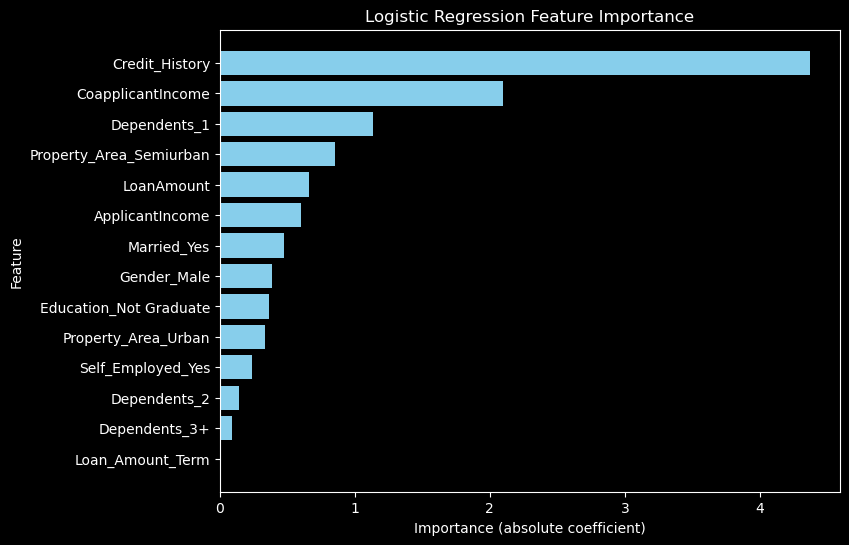

In [384]:
feature_names = x_train_res.columns  # or use X.columns if you have the DataFrame
coefficients = lr_model_smote.coef_[0]  # logistic regression coefficients

# ✅ Create dataframe
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)  # take absolute value
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# ✅ Plot feature importance
plt.figure(figsize=(8,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel("Importance (absolute coefficient)")
plt.ylabel("Feature")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()  # highest at top
plt.show()

In [408]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_scores=cross_val_score(lr_model_smote,x,y,cv=cv,scoring='accuracy',n_jobs=-1)
print("✅Cross-validation accuracies✅:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Std deviation:", np.std(cv_scores))

✅Cross-validation accuracies✅: [0.77981651 0.81651376 0.76851852 0.75925926 0.68518519]
Mean CV accuracy: 0.7618586476384641
Std deviation: 0.04298743297304115


Classification Report (SVM + SMOTE):
              precision    recall  f1-score   support

           0       0.66      0.73      0.69        48
           1       0.77      0.70      0.74        61

    accuracy                           0.72       109
   macro avg       0.71      0.72      0.71       109
weighted avg       0.72      0.72      0.72       109

Confusion Matrix:
[[35 13]
 [18 43]]
ROC-AUC: 0.79474043715847


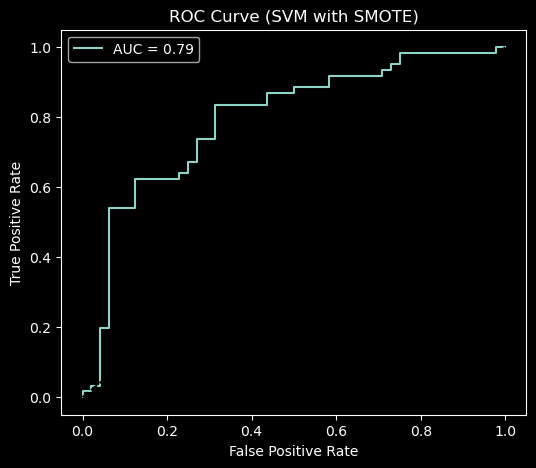

In [410]:
svm_model_smote=SVC(C=1,kernel='linear',probability=True)
svm_model_smote.fit(x_train_res,y_train_res)
y_pred_svm=svm_model_smote.predict(x_test)
y_proba_svm=svm_model_smote.predict_proba(x_test)[:,1]
print("Classification Report (SVM + SMOTE):")
print(classification_report(y_test, y_pred_svm))

# ✅ Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm)

# ✅ ROC-AUC score
roc_auc = roc_auc_score(y_test,y_proba_svm)
print("ROC-AUC:", roc_auc)

# ✅ Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_svm)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SVM with SMOTE)")
plt.legend()
plt.show()

                    Feature  Importance
4            Credit_History    3.055831
1         CoapplicantIncome    2.065810
12  Property_Area_Semiurban    1.045551
7              Dependents_1    0.792639
5               Gender_Male    0.621984
2                LoanAmount    0.561164
0           ApplicantIncome    0.471074
6               Married_Yes    0.420515
11        Self_Employed_Yes    0.395376
13      Property_Area_Urban    0.283500
8              Dependents_2    0.190665
10   Education_Not Graduate    0.099446
9             Dependents_3+    0.011232
3          Loan_Amount_Term    0.003947


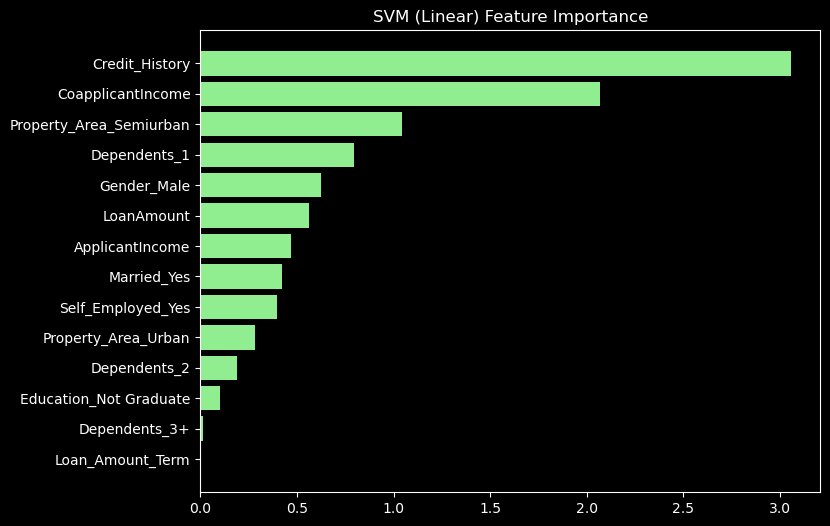

In [411]:
svm_coefficients = svm_model_smote.coef_[0]

svm_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(svm_coefficients)
}).sort_values(by='Importance', ascending=False)

print(svm_importance)

plt.figure(figsize=(8,6))
plt.barh(svm_importance['Feature'], svm_importance['Importance'], color='lightgreen')
plt.title("SVM (Linear) Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [414]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_scores=cross_val_score(svm_model_smote,x,y,cv=cv,scoring='accuracy',n_jobs=-1)
print("✅Cross-validation accuracies✅:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Std deviation:", np.std(cv_scores))

✅Cross-validation accuracies✅: [0.79816514 0.77981651 0.75       0.73148148 0.66666667]
Mean CV accuracy: 0.745225959904859
Std deviation: 0.04556825134398697



=== KNN with SMOTE ===
              precision    recall  f1-score   support

           0       0.80      0.94      0.87        48
           1       0.94      0.82      0.88        61

    accuracy                           0.87       109
   macro avg       0.87      0.88      0.87       109
weighted avg       0.88      0.87      0.87       109

Confusion Matrix:
 [[45  3]
 [11 50]]
ROC-AUC: 0.9294740437158471


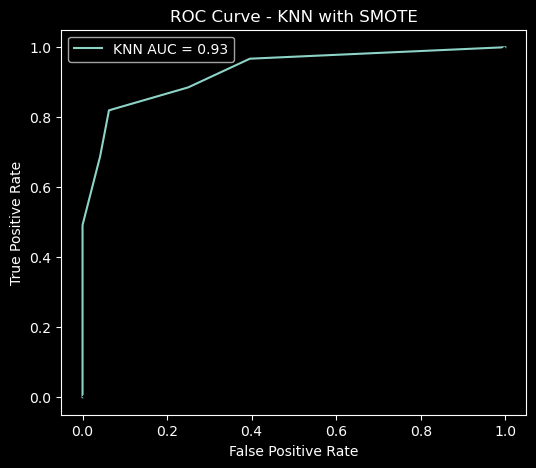

In [416]:
knn_model_smote=KNeighborsClassifier(n_neighbors=5)
knn_model_smote.fit(x_train_res,y_train_res)
y_pred_knn=knn_model_smote.predict(x_test)
y_proba_knn=knn_model_smote.predict_proba(x_test)[:,1]
print("\n=== KNN with SMOTE ===")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_knn))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"KNN AUC = {roc_auc_score(y_test, y_proba_knn):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN with SMOTE")
plt.legend()
plt.show()

                    Feature  Importance
3          Loan_Amount_Term    0.130275
2                LoanAmount    0.075229
0           ApplicantIncome    0.064220
4            Credit_History    0.051376
6               Married_Yes    0.046789
5               Gender_Male    0.044037
1         CoapplicantIncome    0.030275
10   Education_Not Graduate    0.024771
13      Property_Area_Urban    0.019266
12  Property_Area_Semiurban    0.018349
7              Dependents_1    0.013761
9             Dependents_3+    0.001835
11        Self_Employed_Yes    0.000917
8              Dependents_2   -0.004587


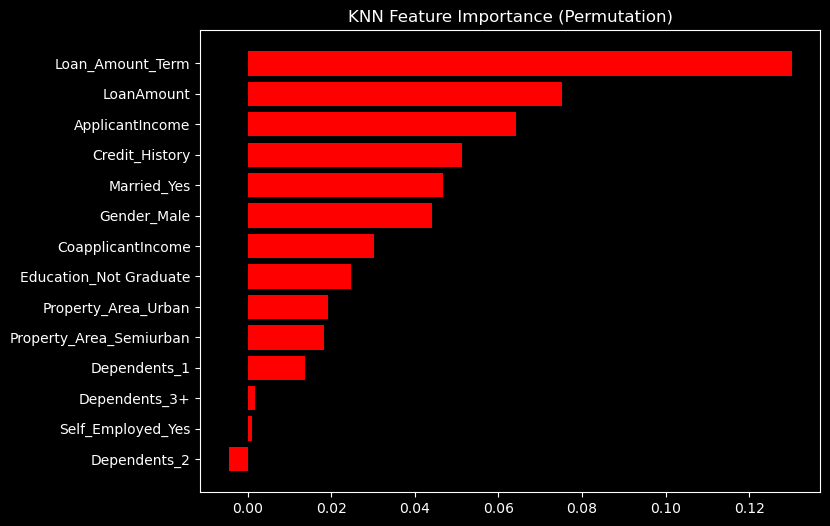

In [420]:
result = permutation_importance(knn_model_smote, x_test, y_test, n_repeats=10, random_state=42)

knn_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(knn_importance)

plt.figure(figsize=(8,6))
plt.barh(knn_importance['Feature'], knn_importance['Importance'], color='red')
plt.title("KNN Feature Importance (Permutation)")
plt.gca().invert_yaxis()
plt.show()

In [422]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_scores=cross_val_score(knn_model_smote,x,y,cv=cv,scoring='accuracy',n_jobs=-1)
print("✅Cross-validation accuracies✅:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Std deviation:", np.std(cv_scores))

✅Cross-validation accuracies✅: [0.78899083 0.83486239 0.81481481 0.82407407 0.84259259]
Mean CV accuracy: 0.8210669384981312
Std deviation: 0.018604714806558714


=== Classification Report (SMOTE + Random Forest) ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.97      0.98        61

    accuracy                           0.98       109
   macro avg       0.98      0.98      0.98       109
weighted avg       0.98      0.98      0.98       109

Confusion Matrix:
 [[48  0]
 [ 2 59]]
ROC-AUC: 0.9849726775956285


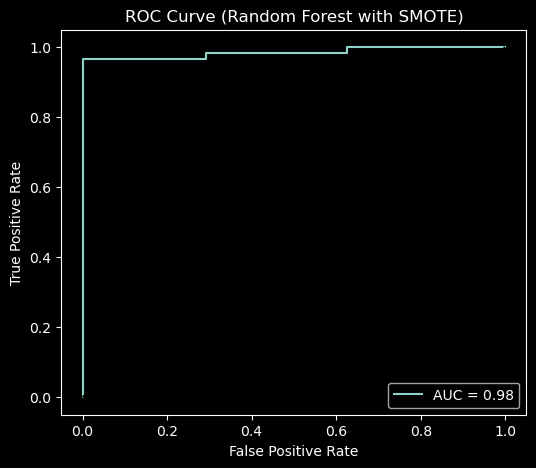

In [456]:
rf_model=RandomForestClassifier(max_depth= 10, min_samples_split= 2, n_estimators= 100,class_weight='balanced')
rf_model.fit(x_train_res,y_train_res)
y_pred_rf=rf_model.predict(x_test)
y_proba_rf = rf_model.predict_proba(x_test)[:,1]
y_pred_rf_train = rf_model.predict(x_train)

print("=== Classification Report (SMOTE + Random Forest) ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba_rf):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest with SMOTE)")
plt.legend()
plt.show()

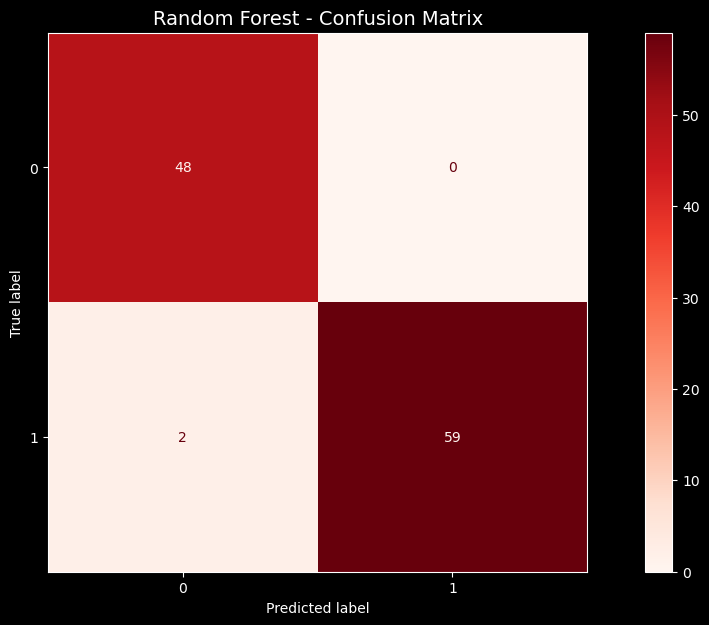

In [460]:
cm=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_model.classes_)
fig,ax=plt.subplots(figsize=(15,7))
disp.plot(cmap=plt.cm.Reds,ax=ax,values_format='d')
plt.title('Random Forest - Confusion Matrix',fontsize=14)
plt.savefig("conf_matrix_random_forest.png", dpi=300, bbox_inches="tight")
plt.show()

                    Feature  Importance
4            Credit_History    0.203075
0           ApplicantIncome    0.201469
2                LoanAmount    0.159181
1         CoapplicantIncome    0.143291
3          Loan_Amount_Term    0.059726
12  Property_Area_Semiurban    0.041603
6               Married_Yes    0.032714
13      Property_Area_Urban    0.026985
10   Education_Not Graduate    0.026007
7              Dependents_1    0.024073
9             Dependents_3+    0.022796
5               Gender_Male    0.022684
11        Self_Employed_Yes    0.019308
8              Dependents_2    0.017088


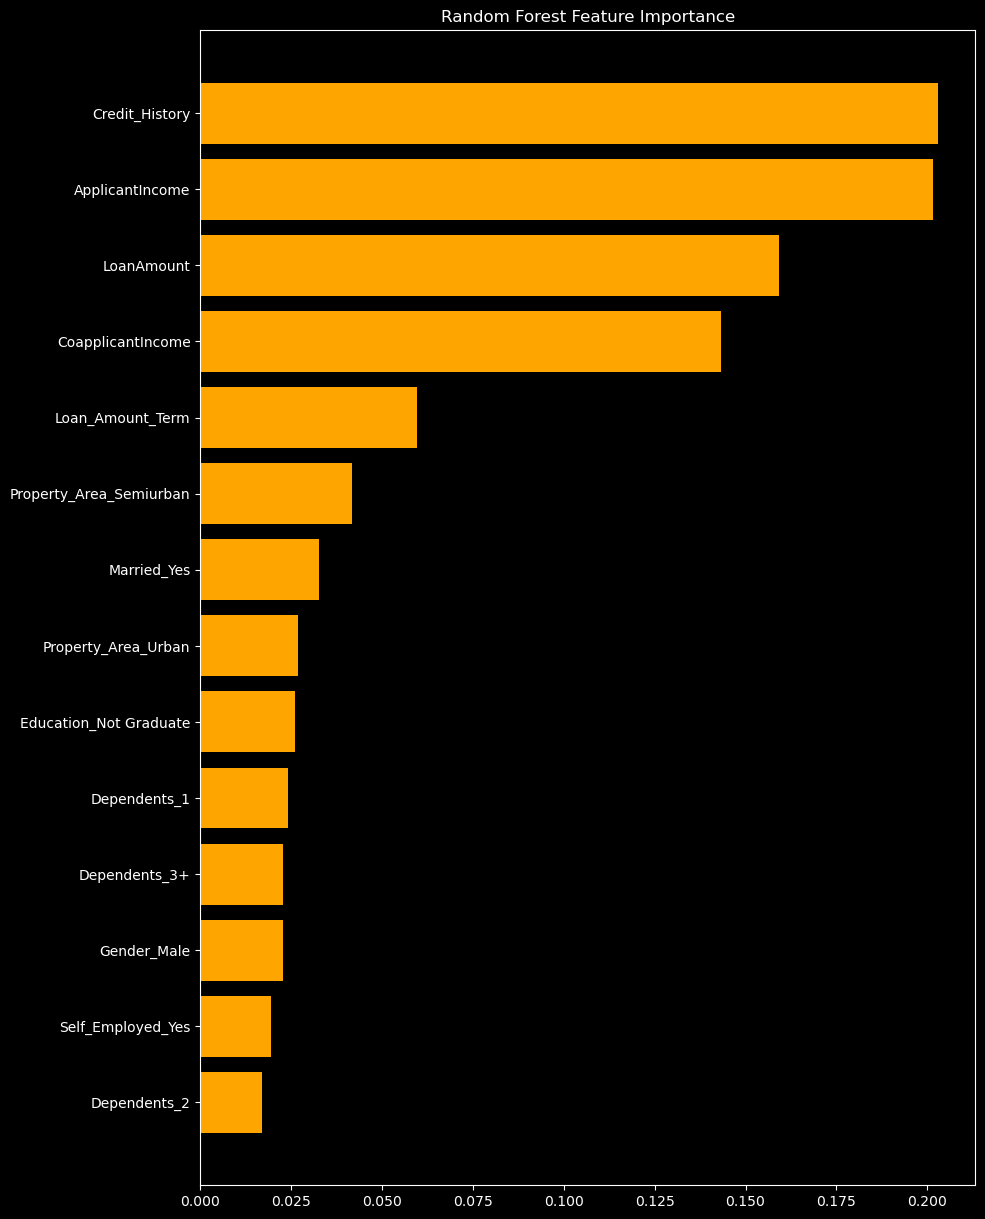

In [462]:
feature_names=x_train_tree.columns
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_importance)

plt.figure(figsize=(10,15))
plt.barh(rf_importance['Feature'], rf_importance['Importance'], color='orange')
plt.title("Random Forest Feature Importance")
plt.savefig("feature_importance_random_forest.png", dpi=300, bbox_inches="tight")
plt.gca().invert_yaxis()
plt.show()

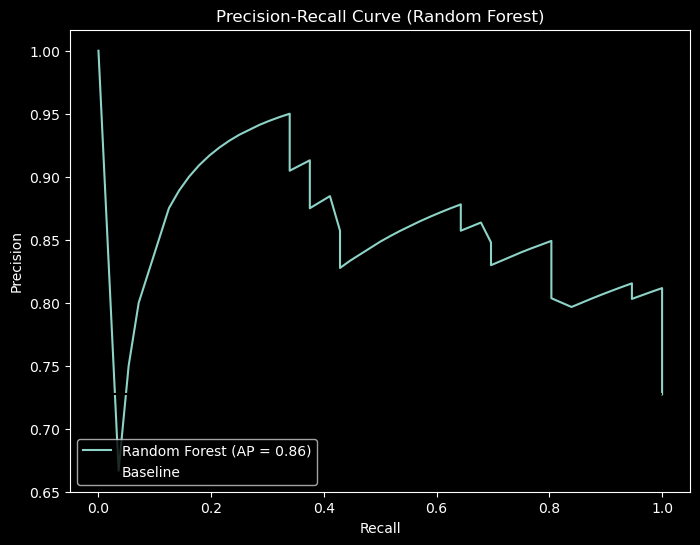

In [466]:
y_proba_rf = rf_model.predict_proba(x_test_tree)[:, 1]

# Compute precision-recall values
precision, recall, _ = precision_recall_curve(y_test_tree, y_proba_rf)

# Compute average precision (AP)
avg_prec = average_precision_score(y_test_tree, y_proba_rf)

# Plot
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f"Random Forest (AP = {avg_prec:.2f})")

# Baseline: positive class ratio
baseline = y_test_tree.mean()
plt.hlines(y=baseline, xmin=0, xmax=1, colors='k', linestyles='--', label="Baseline")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Random Forest)")
plt.legend(loc="lower left")
plt.savefig("AP_curve_random_forest.png", dpi=300, bbox_inches="tight")
plt.show()

In [458]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_scores=cross_val_score(rf_model,x,y,cv=cv,scoring='accuracy',n_jobs=-1)
print("✅Cross-validation accuracies✅:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Std deviation:", np.std(cv_scores))

✅Cross-validation accuracies✅: [0.97247706 0.9266055  0.90740741 0.94444444 0.94444444]
Mean CV accuracy: 0.9390757730207271
Std deviation: 0.02159483500713433


=== Classification Report (SMOTE + Gradient Boosting) ===
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        48
           1       1.00      0.89      0.94        61

    accuracy                           0.94       109
   macro avg       0.94      0.94      0.94       109
weighted avg       0.94      0.94      0.94       109

Confusion Matrix:
 [[48  0]
 [ 7 54]]
ROC-AUC: 0.9603825136612022


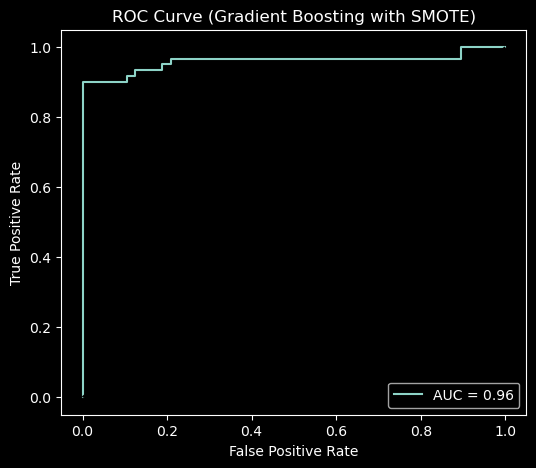

In [444]:
gb_model_smote = XGBClassifier(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=42)
gb_model_smote.fit(x_train_res, y_train_res)

y_pred_gb = gb_model_smote.predict(x_test)
y_proba_gb = gb_model_smote.predict_proba(x_test)[:,1]

print("=== Classification Report (SMOTE + Gradient Boosting) ===")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_gb))

fpr, tpr, _ = roc_curve(y_test, y_proba_gb)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba_gb):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Gradient Boosting with SMOTE)")
plt.legend()
plt.show()


                    Feature  Importance
4            Credit_History    0.332525
12  Property_Area_Semiurban    0.109847
1         CoapplicantIncome    0.094071
7              Dependents_1    0.078691
9             Dependents_3+    0.073588
3          Loan_Amount_Term    0.051820
0           ApplicantIncome    0.051158
6               Married_Yes    0.048849
2                LoanAmount    0.036075
10   Education_Not Graduate    0.034797
5               Gender_Male    0.032310
13      Property_Area_Urban    0.030878
11        Self_Employed_Yes    0.019318
8              Dependents_2    0.006072


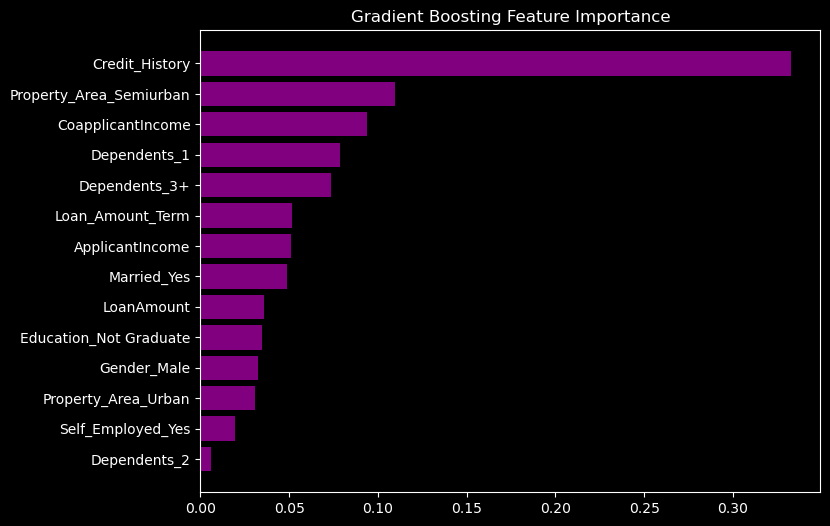

In [448]:
gb_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_model_smote.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(gb_importance)

plt.figure(figsize=(8,6))
plt.barh(gb_importance['Feature'], gb_importance['Importance'], color='purple')
plt.title("Gradient Boosting Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [450]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_scores=cross_val_score(gb_model_smote,x,y,cv=cv,scoring='accuracy',n_jobs=-1)
print("✅Cross-validation accuracies✅:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Std deviation:", np.std(cv_scores))

✅Cross-validation accuracies✅: [0.95412844 0.91743119 0.92592593 0.91666667 0.90740741]
Mean CV accuracy: 0.9243119266055047
Std deviation: 0.016019904838460226
